This notebook contains the autocorrelation analysis for the household_power_consumption dataset

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions #Contains built functions for the project
from statsmodels.graphics.tsaplots import plot_acf

Read and preprocess the dataset

In [ ]:
path = "household_power_consumption.txt"
df = functions.load_data(path)

#Preprocess dataset and convert to hourly
df_hourly = functions.preprocess_data(df).reset_index()

In [10]:
df_hourly.head()

,datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-17 00:00:00,1.882467,0.102433,8.126667,240.961833,0.0,0.466667,0.000000
1,2006-12-17 01:00:00,3.349400,0.136933,14.246667,240.448333,0.0,25.233333,0.000000
2,2006-12-17 02:00:00,1.587267,0.078233,6.870000,245.818667,0.0,0.566667,0.000000
3,2006-12-17 03:00:00,1.662200,0.079533,7.206667,244.513500,0.0,0.766667,0.000000
4,2006-12-17 04:00:00,2.215767,0.093467,9.333333,243.855500,0.0,0.566667,8.883333


Here we perform the stationary test (Augmented Dickey-Fuller) for the target variable. As the time series is stationary we can use the autocorrelation function. In our dataset, 1 lag represents delay of 1 hour.

ADF Statistic: -11.117910423820225
p value: 3.5250721631869835e-20


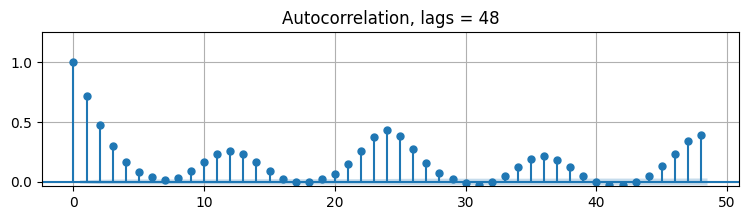

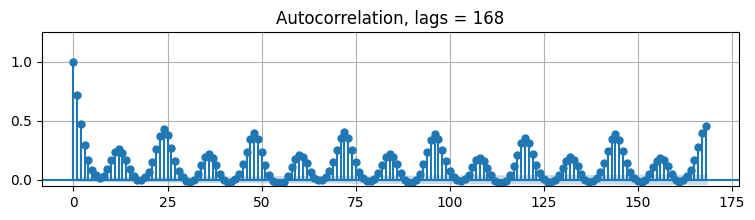

In [71]:
#Save consumption to numpy array
consumption = df_hourly["Global_active_power"].to_numpy()
consumption
#Stationary test
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(consumption[:1000*24])
print(f"ADF Statistic: {ADF_result[0]}")
print(f"p value: {ADF_result[1]}")

fig, ax = plt.subplots(figsize=(9, 2))
plot_acf(consumption[:1000*24],lags=48,auto_ylims=True,ax=ax)
plt.title(f"Autocorrelation, lags = 48")
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(9, 2))
plot_acf(consumption[:1000*24],lags=7*24,auto_ylims=True,ax=ax)
plt.title(f"Autocorrelation, lags = 168")
plt.grid()
plt.show()


The autocorrelation function plots indicate significant relationships in daily and weekly patterns.